#El problema de negocio

Un banco contrata a una empresa de marketing. 
Pregunta:
Qué perfil tienen que tener los clientes con mayor potencial de conversión?

# Importar librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google Drive

In [ ]:
from google.colab import drive
drive.mount ("/gdrive")

ruta= "/gdrive/MyDrive/Colab Notebooks/Dataset_banco/dataset_banco.csv"
df = pd.read_csv(ruta)

Mounted at /gdrive


# Primeras características

Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular") 
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
#Ver filas y columnas
print (df.shape)

#Primeras lineas de código
df.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
#Variables categóricas y numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


# Limpieza de datos

##1.Datos Faltantes

In [ ]:
#Al ser pocos los datos faltantes, elimino las filas
#dropna (borrar celdas sin datos) / inplace=true (guardarlo en el mismo df)
df.dropna (inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##2.Columnas Irrelevantes: Columnas categóricas con un solo nivel. Columnas numéricas con un solo valor.


In [ ]:
#Conteo de niveles en las columnas categóricas (Si tuviera 1 solo nivel no sirve.)
#seleccionamos las columnas categóricas:
cols_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]

#ciclo buscando los niveles de cada categoria:
for col in cols_cat:
  print(f"Columna {col}: {df[col].nunique()} subniveles ")

Columna job: 18 subniveles 
Columna marital: 6 subniveles 
Columna education: 10 subniveles 
Columna default: 2 subniveles 
Columna housing: 2 subniveles 
Columna loan: 6 subniveles 
Columna contact: 5 subniveles 
Columna month: 12 subniveles 
Columna poutcome: 6 subniveles 
Columna y: 2 subniveles 


In [ ]:
#Vemos las columnas numéricas:
#Si std es cero, quiere decir que todos los valores son iguales y deberiamos eliminarla.
df.describe ()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##3.Filas repetidas

In [ ]:
#Escribir el tamaño de filas
print (f"El tamaño de filas antes de eliminar las filas repetidas es: {df.shape}")

#Eliminar las filas repetidas y guardar en el mismo df
df.drop_duplicates(inplace=True)

#Escribir el tamaño de filas luego de eliminar las repetidas
print (f"El tamaño de filas luego de eliminar las filas repetidas es: {df.shape}")

El tamaño de filas antes de eliminar las filas repetidas es: (45207, 17)
El tamaño de filas luego de eliminar las filas repetidas es: (45203, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45203 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45203 non-null  int64  
 1   job        45203 non-null  object 
 2   marital    45203 non-null  object 
 3   education  45203 non-null  object 
 4   default    45203 non-null  object 
 5   balance    45203 non-null  float64
 6   housing    45203 non-null  object 
 7   loan       45203 non-null  object 
 8   contact    45203 non-null  object 
 9   day        45203 non-null  int64  
 10  month      45203 non-null  object 
 11  duration   45203 non-null  float64
 12  campaign   45203 non-null  int64  
 13  pdays      45203 non-null  float64
 14  previous   45203 non-null  int64  
 15  poutcome   45203 non-null  object 
 16  y          45203 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##4.Outliers (Valores extremos)

Graficamos Boxplot para observar los valores extremos de las categorias numéricas

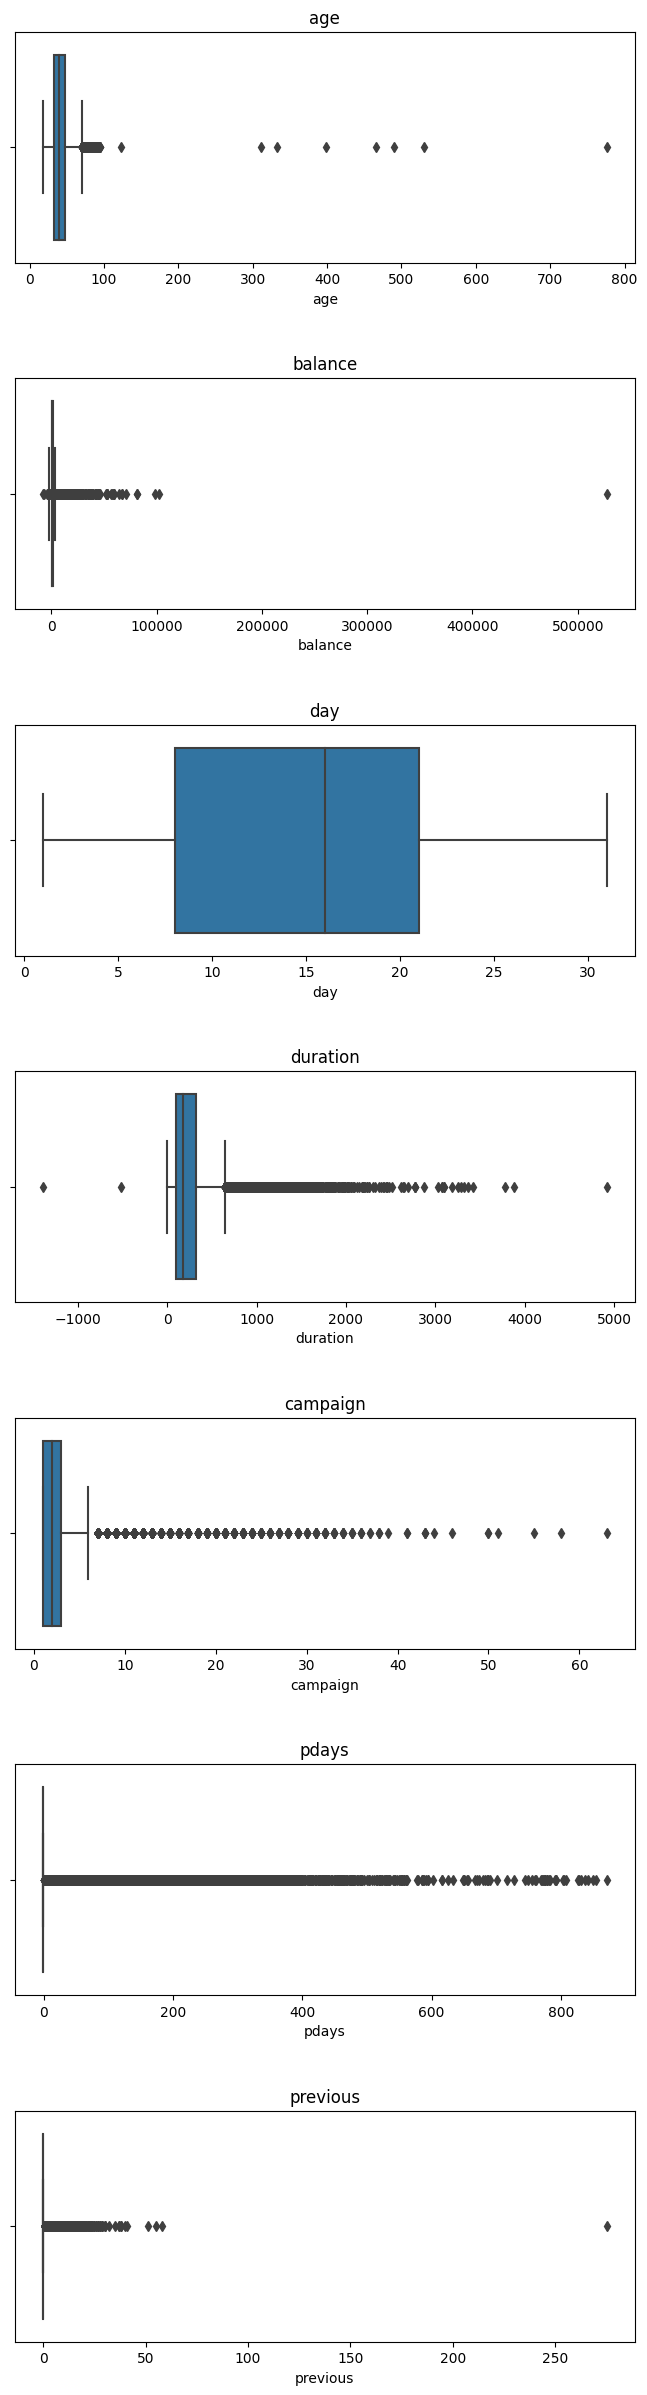

In [ ]:
#Generar graficas individuales porque las variables numéricas estan en diferentes rangos.
#Seleccionar las variables numéricas:
cols_num = ["age", "balance", "day",	"duration",	"campaign",	"pdays",	"previous"]

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

plt.show()


Observaciones: 
* Age: Hay personas con mas de 100 años.
* Duration: Hay llamadas negativas.
* Previus: LLamaron más de 300 veces.

In [ ]:
#Eliminar Age
#Cuantas filas hay antes de eliminar.
print(f"La cantidad de filas antes de eliminar registros de edad es: {df.shape}")
#Guardar en el df la columna age con valores menores o iguales a 100.
df = df [df["age"] <= 100]
#Cuantas filas hay luego de eliminar.
print(f"La cantidad de filas luego de eliminar registros de edad es: {df.shape}")


La cantidad de filas antes de eliminar registros de edad es: (45203, 17)
La cantidad de filas luego de eliminar registros de edad es: (45195, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45195 non-null  int64  
 1   job        45195 non-null  object 
 2   marital    45195 non-null  object 
 3   education  45195 non-null  object 
 4   default    45195 non-null  object 
 5   balance    45195 non-null  float64
 6   housing    45195 non-null  object 
 7   loan       45195 non-null  object 
 8   contact    45195 non-null  object 
 9   day        45195 non-null  int64  
 10  month      45195 non-null  object 
 11  duration   45195 non-null  float64
 12  campaign   45195 non-null  int64  
 13  pdays      45195 non-null  float64
 14  previous   45195 non-null  int64  
 15  poutcome   45195 non-null  object 
 16  y          45195 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
#Eliminar Duration
#Cuantas filas antes de eliminar.
print(f"La cantidad de filas antes de eliminar registros de duracion es: {df.shape}")
#Guardar en el df la columna duration con valores mayor a 0.
df = df [df ["duration"]> 0]
#Cuantas filas despues de eliminar
print(f"La cantidad de filas luego de eliminar registros de duracion es: {df.shape}")


La cantidad de filas antes de eliminar registros de duracion es: (45195, 17)
La cantidad de filas luego de eliminar registros de duracion es: (45190, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45190 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45190 non-null  int64  
 1   job        45190 non-null  object 
 2   marital    45190 non-null  object 
 3   education  45190 non-null  object 
 4   default    45190 non-null  object 
 5   balance    45190 non-null  float64
 6   housing    45190 non-null  object 
 7   loan       45190 non-null  object 
 8   contact    45190 non-null  object 
 9   day        45190 non-null  int64  
 10  month      45190 non-null  object 
 11  duration   45190 non-null  float64
 12  campaign   45190 non-null  int64  
 13  pdays      45190 non-null  float64
 14  previous   45190 non-null  int64  
 15  poutcome   45190 non-null  object 
 16  y          45190 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
#Eliminar Previous
#Tamaño de set antes de eliminar 
print (f"El tamaño del set antes de eliminar filas es: {df.shape}")
#Guardar en df la columna previous con valores menores o iguales a 100.
df = df [df ["previous"]<=100]
#Tamaño del dataset luego de eliminar registros.
print (f"El tamaño del set luego de eliminar filas es: {df.shape}")

El tamaño del set antes de eliminar filas es: (45190, 17)
El tamaño del set luego de eliminar filas es: (45189, 17)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##5.Errores tipográficos en variables categóricas

Graficar los subniveles de las variables categóricas

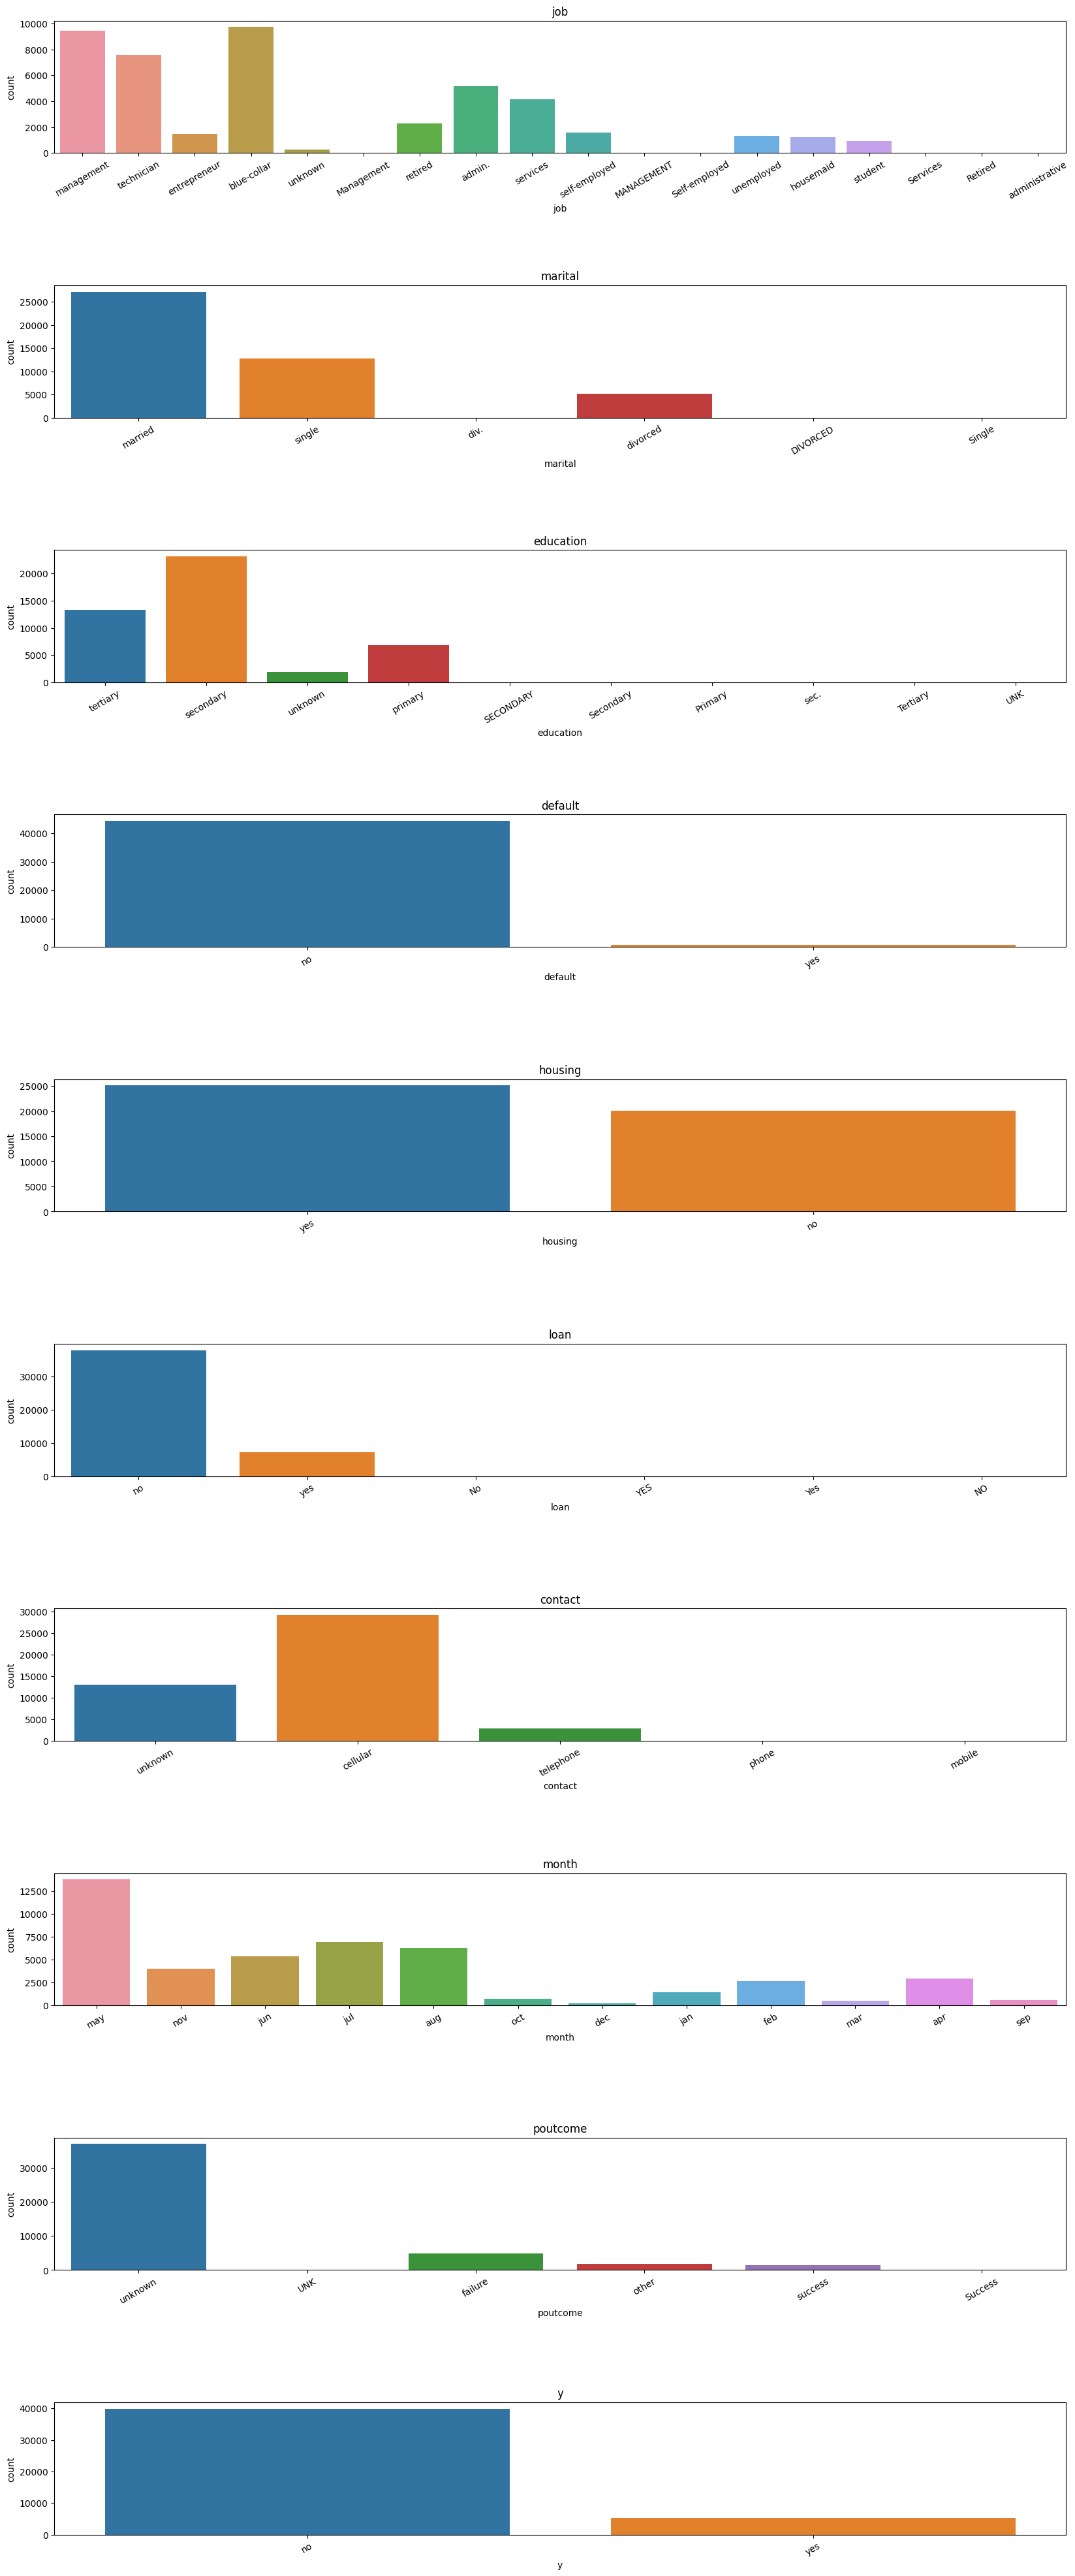

In [ ]:
#seleccionamos las columnas categóricas:
cols_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]

fig, ax = plt.subplots (nrows=10, ncols=1, figsize=(20,50))
plt.subplots_adjust (hspace=1)

for i, col in enumerate (cols_cat):
    sns.countplot (data=df, x=col, ax=ax[i])
    ax[i].set_title (col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Se observa que hay subniveles escritos de diferente forma, minúsculas, mayusculas, etc. Se procede a unificarlos.

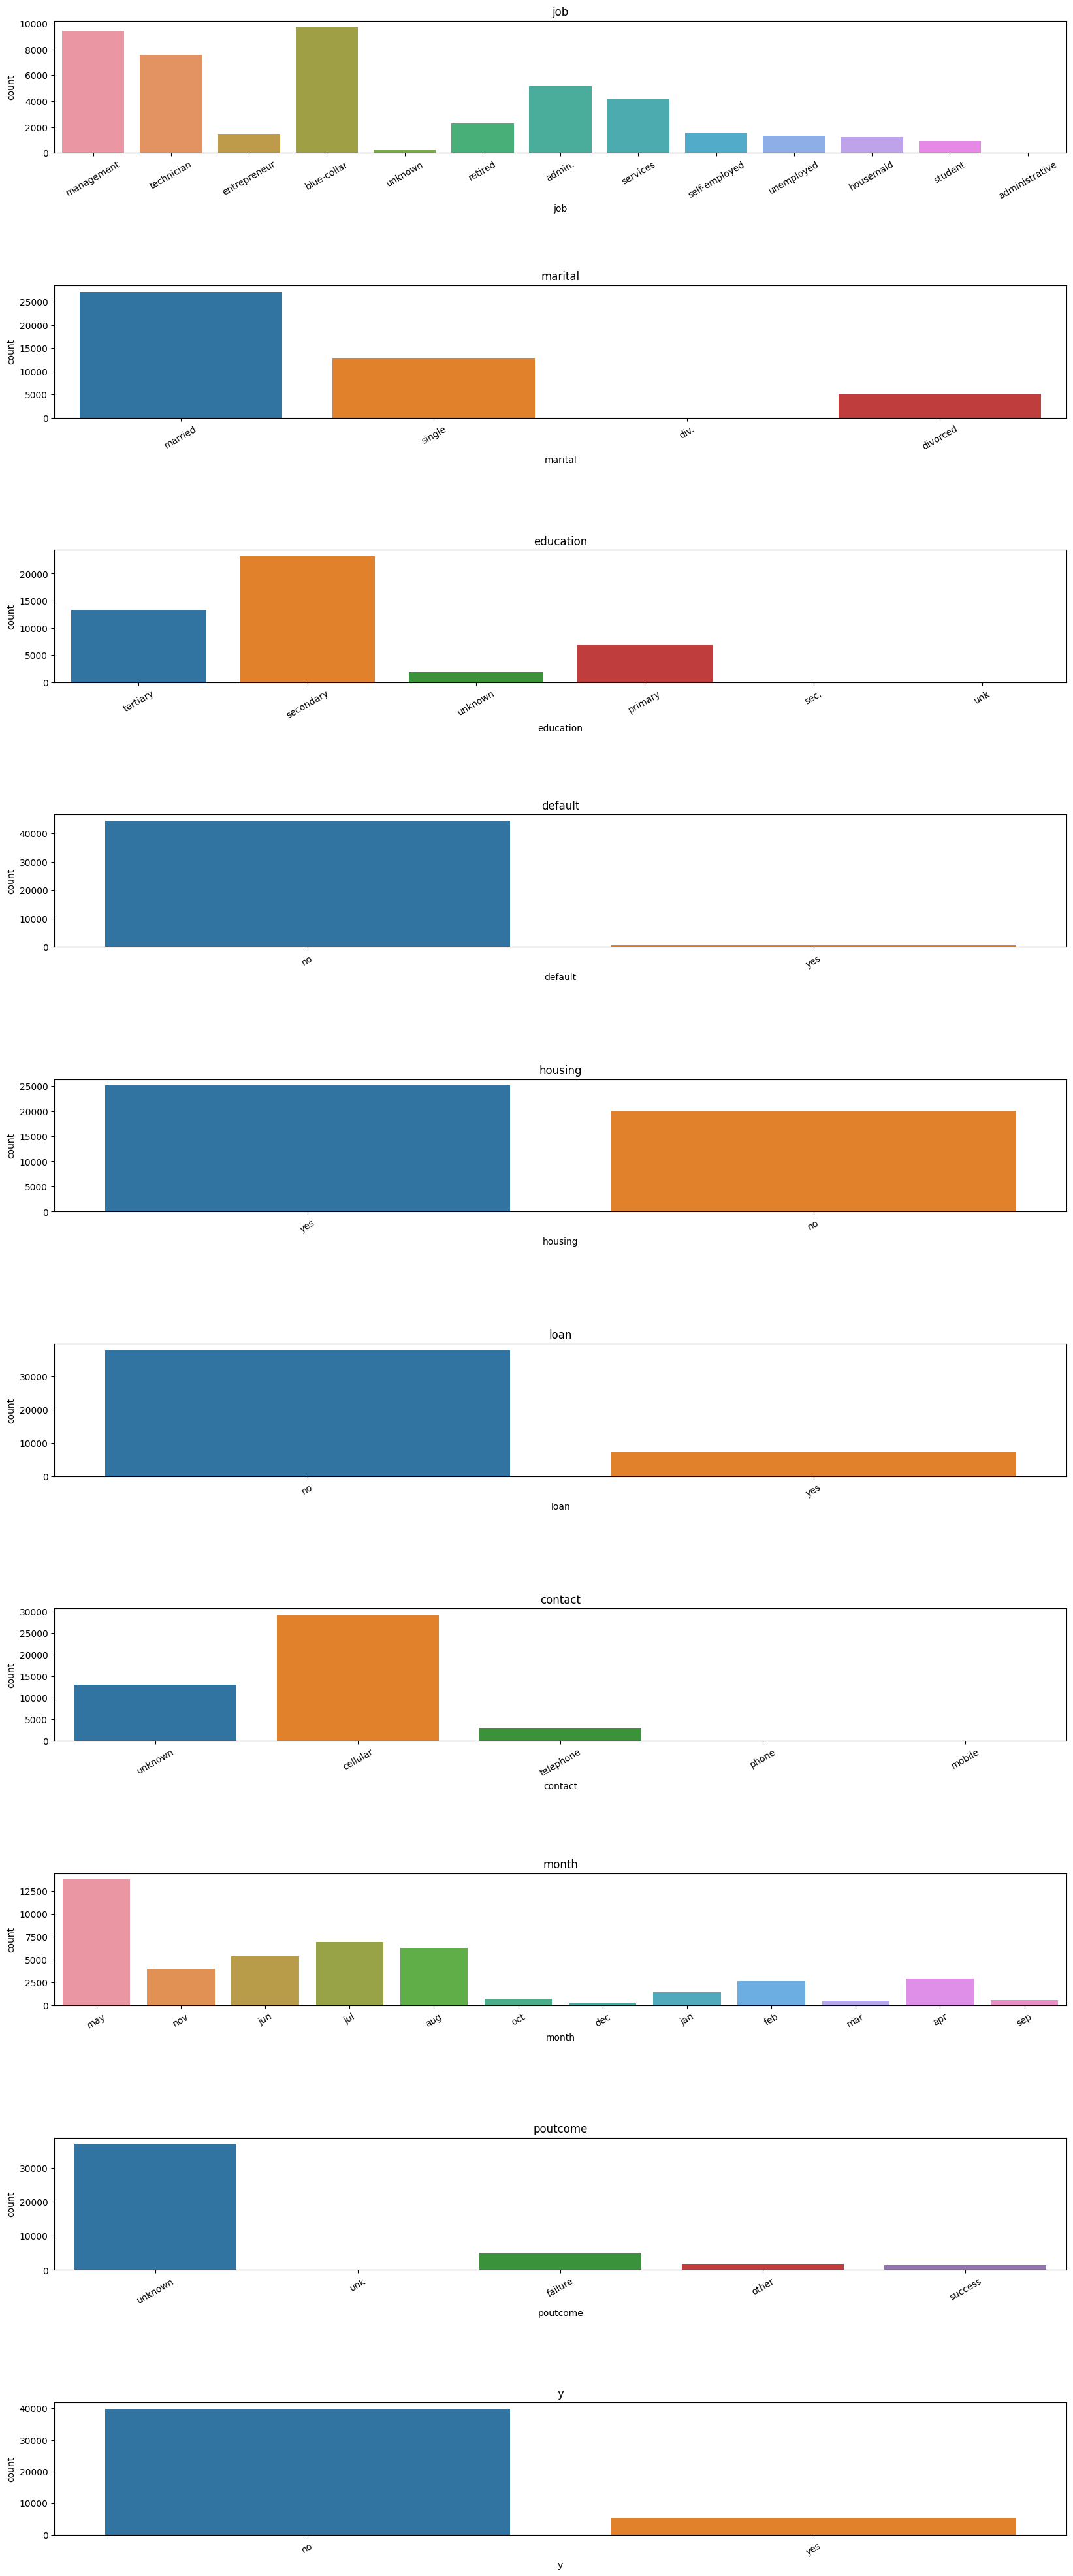

In [ ]:
#Convertir todos los str a minuscula de las columnas categóricas
for column in df.columns:
  for column in cols_cat:
    df[column]=df[column].str.lower()

#Graficar nuevamente.
cols_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]

fig, ax = plt.subplots (nrows=10, ncols=1, figsize=(20,50))
plt.subplots_adjust (hspace=1)

for i, col in enumerate (cols_cat):
    sns.countplot (data=df, x=col, ax=ax[i])
    ax[i].set_title (col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
#Ver subniveles
print(df["job"].unique())

#Reemplazar admin. por administrative
df["job"] = df["job"].replace ("admin." , "administrative")  #se agrega regrex=False por el punto de admin

#Ver subniveles con la modificación.
print (df["job"].unique())  #unique muestra los valores unicos


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Columna job: unificar admin. por administrative


Colmna marital: unificar div. por divorced

In [ ]:
#Ver subniveles
print (df["marital"].unique())

#Reemplzar div. por divorced
df["marital"] = df["marital"].replace ("div.", "divorced")

#Ver subniveles modificados
print (df["marital"].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Columna education: unificar sec. por secondary y unk por unknown


In [ ]:
#Ver subniveles
print (df["education"].unique())

#Reemplazar sec. por secondary
df["education"]=df["education"].replace ("sec.", "secondary")
#Reemplzar unk por unknown
df ["education"] = df ["education"].replace ("unk", "unknown")

#Ver subniveles modificados
print (df["education"].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Columna contact : unificar phone por telephone y mobile por cellular

In [ ]:
#Ver subniveles
print (df["contact"].unique())

#Reemplzar phone por telephone
df["contact"]=df["contact"].replace ("phone", "telephone")
#Reemplazar mobile por cellular
df["contact"]=df["contact"].replace ("mobile", "cellular")

#Ver subniveles
print (df["contact"].unique())


['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Columna pountcome : unificar unk con unknown

In [ ]:
#Ver subniveles antes de modificar
print (df["poutcome"].unique())

#Reemplazar unk por unknown
df["poutcome"]=df["poutcome"].replace("unk", "unknown")

#Ver subniveles modificados
print(df["poutcome"].unique())

['unknown' 'unknow' 'failure' 'other' 'success']
['unknown' 'unknow' 'failure' 'other' 'success']


In [ ]:
df["poutcome"]=df["poutcome"].replace("unknow","unknown")
print (df["poutcome"].unique())

['unknown' 'failure' 'other' 'success']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
#Medida df final
df.shape

(45189, 17)

#Final: La limpieza ya esta realizada. 

El data set comenzo con (45215, 17), luego de la limpieza (45189, 17)

Guardar el data set en la misma carpeta para el Análisis exploratorio.

In [ ]:
ruta = "/gdrive/MyDrive/Colab Notebooks/Dataset_banco/dataset_banco_clean.csv"
df.to_csv(ruta)